In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

(87, 65)


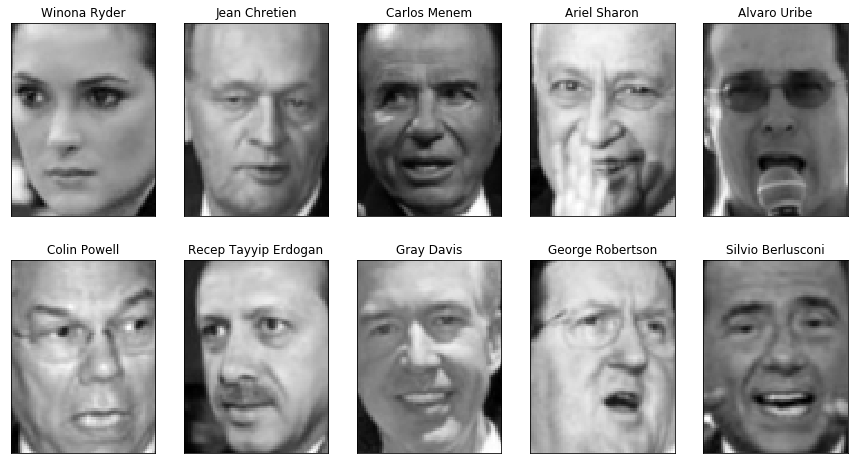

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
print(image_shape)
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [3]:
print("people.images.shape: {}" .format(people.images.shape))
print("Number of classes: {}" .format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [4]:
#count how often each target appears
counts = np.bincount(people.target)
#print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}" .format(name, count), end=' ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [5]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#scale the grayscale values to be between 0 and 1
#instead of 0 and 255 for better numeric stability
X_people = X_people / 255

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#split the data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
#build a KNeighborsClassifier using a one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [7]:
from collections import Counter
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [8]:
k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 0.23255813953488372


In [9]:
X_train_stand = (X_train - np.mean(X_train, axis = 0))/ np.std(X_train, axis = 0, ddof = 1)
X_test_stand = (X_test - np.mean(X_test, axis = 0))/ np.std(X_test, axis = 0, ddof = 1)
X_train_stand.shape, X_test_stand.shape

((1547, 5655), (516, 5655))

In [10]:
U, e, vT = np.linalg.svd(X_train_stand)

In [11]:
W100 = vT.T[:,:100]
V100 = e[:100]
X_train_100D = X_train_stand.dot(W100)
X_test_100D = X_test_stand.dot(W100)
X_train_100D.shape, X_test_100D.shape

((1547, 100), (516, 100))

In [12]:
k = 1
clf_100D = KNN(k=k)
clf_100D.fit(X_train_100D, y_train)
predictions_100D = clf_100D.predict(X_test_100D)
print("KNN classification accuracy", accuracy(y_test, predictions_100D))

KNN classification accuracy 0.2558139534883721


In [13]:
X_whitening_train = X_train_100D / np.sqrt(V100)
X_whitening_test = X_test_100D / np.sqrt(V100)
X_whitening_train.shape, X_whitening_test.shape

((1547, 100), (516, 100))

In [14]:
k = 1
clf_whitening = KNN(k=k)
clf_whitening.fit(X_whitening_train, y_train)
predictions_whitening = clf_whitening.predict(X_whitening_test)
print("KNN classification accuracy", accuracy(y_test, predictions_whitening))

KNN classification accuracy 0.3507751937984496


In [15]:
W2 = vT.T[:,:2]
X_train_2D = X_train_stand.dot(W2)
X_train_2D.shape

(1547, 2)

<function matplotlib.pyplot.show(*args, **kw)>

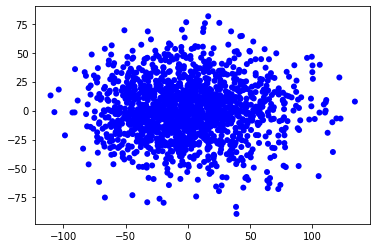

In [16]:
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c='b', edgecolor='none')
plt.show